##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
***Team number:***

---

SHASHANK SAI ALLADI, RAGHAV SARDA, ANISH KARAR, RISHITH DAMANI, SHOUNAK ACHARYA

---
2021A7PS1507H, 2021A7PS2765H, 2021A3PS0970H, 2021A3PS2147H, 2021AAPS2120H


This assignment aims to identify the differences between three sets of Machine Learning models.

# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

In [417]:
%pip install sdv
%pip install urllib3==1.25.4


In [418]:
# Importing the needed libraries
import pandas as pd
import numpy as np

Please upload the real dataset "Diabetes.xls.csv" (as a CSV file) locally onto this notebook before running the cell below

In [419]:
# Reading the CSV file as a DataFrame
real_data = pd.read_csv('/content/diabetes2 - Diabetes.xls.csv')

# Displaying the first 5 rows of our DataFrame
real_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [420]:
# Importing the required library and modules
from sdv.metadata import SingleTableMetadata

# Creating a SingleTableMetadata instance
metadata = SingleTableMetadata()


In [421]:
# Detecting the metadata from real_data DataFrame
metadata.detect_from_dataframe(data=real_data)


In [422]:
# Importing the required library and modules
from sdv.lite import SingleTablePreset

# Creating a SingleTablePreset synthesizer instance called 'FAST_ML'
synthesizer = SingleTablePreset(metadata, name='FAST_ML')


If you see an error on the cell below, restart run time and run all cells

In [423]:
# Fitting the synthesizer model using the real data
synthesizer.fit(data=real_data)


In [424]:
# Generating the synthetic data with 500 rows
synth_data = synthesizer.sample(num_rows=500)

# Displaying the first 5 rows of our synthetic data
synth_data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,149,96,19,10,38.387409,0.561331,40,1
1,0,151,44,6,105,26.125923,0.463959,27,1
2,3,169,57,24,240,33.224573,0.541364,36,0
3,4,86,61,35,0,32.918264,0.526311,39,0
4,6,75,62,31,77,37.453830,0.178734,21,0


In [540]:
# Download the synthetic dataset here
synth_data.to_csv('GeneratedDataSet.csv')

# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

In [425]:
# Extracting the feature data from the DataFrame 'synth_data'.
X=synth_data.iloc[:,:-1].values

# Extracting the target or label data from the DataFrame 'synth_data'.
Y=synth_data.iloc[:,-1].values


In [426]:
# Defining a custom train_test_split function
def custom_train_test_split(X, Y, test_size=0.25, random_state=None, shuffle=True):
    if random_state is not None:
        np.random.seed(random_state)

    # Determining the number of samples for our test set
    num_test_samples = int(len(X) * test_size)

    if shuffle:
        # Shuffling the data randomly
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        X = X[indices]
        Y = Y[indices]

    # Spliting the data into training and test sets
    X_train, X_test = X[:-num_test_samples], X[-num_test_samples:]
    y_train, y_test = Y[:-num_test_samples], Y[-num_test_samples:]

    return X_train, X_test, y_train, y_test

# Spliting the data using custom function
X_train, X_test, y_train, y_test = custom_train_test_split(X, Y, random_state=2120, test_size=0.25, shuffle=True)


In [427]:
def normalize(array):
    # Calculating the mean and standard deviation along each feature
    mean = np.mean(array, axis=0)
    std = np.std(array, axis=0)

    # Normalizing the data by subtracting the mean and dividing by the standard deviation
    normalized_data = (array - mean) / std

    return normalized_data


In [428]:
# Normalizing the training data (X_train)
X_train = normalize(X_train)

# Normalizing the test data (X_test)
X_test = normalize(X_test)


**A correlation matrix is a table that shows the strength and direction of linear relationships between variables in a dataset. It uses values ranging from -1 (perfect negative correlation) to 1 (perfect positive correlation) to indicate the degree of association, with 0 indicating no linear relationship. Correlation matrices are valuable tools in data analysis for understanding connections between variables.**

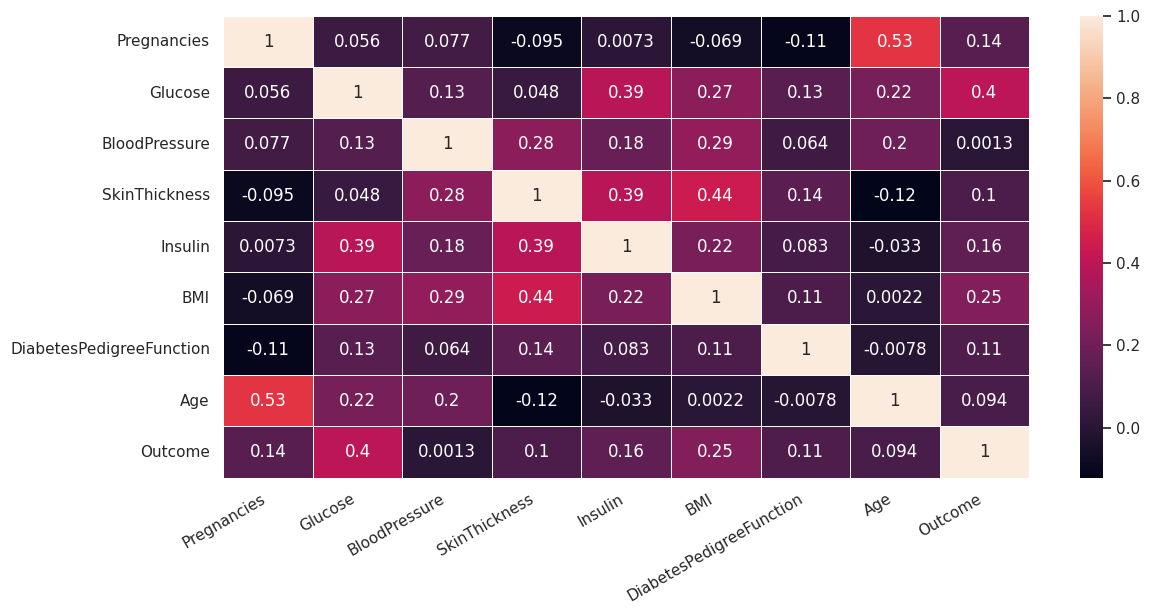

In [539]:

corrmat = synth_data.corr()

plt.figure(figsize=(13, 6))
sns.heatmap(corrmat, vmax = 1, annot = True, linewidths = .5)
plt.xticks(rotation=30, horizontalalignment='right')
plt.show()

In [452]:
import seaborn as sns
import matplotlib.pyplot as plt

# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

### Batch Gradient Descent vs Stochastic Gradient Descent
Stochastic Gradient Descent and Batch Gradient Descent differ in their approach to updating model parameters during training. In Stochastic Gradient Descent, the parameters are updated after processing each individual data point, introducing randomness and rapid updates. This can lead to faster convergence but with more erratic steps. In contrast, Batch Gradient Descent updates parameters once per batch, providing a more stable but computationally intensive process as it requires storing and processing the entire batch. The choice between them depends on the trade-off between computational efficiency and convergence stability in training machine learning models.

In [525]:
# Assuming you have already defined X_train, y_train

# Initializing weights, learning rate, number of epochs, and bias
wS = np.zeros(len(X_train[0]), dtype=float)
Slrate = 1
Sepoch = 1000
bS = 0.0

# Array to store the cost at each epoch
Scost = np.zeros(Sepoch)

# Training loop
for i in range(Sepoch):
    # Initializing weight and bias differences, and cost
    bSdiff = 0
    wSdiff = np.zeros(len(X_train[0]), dtype=float)
    epoch_cost = 0

    # Randomly selecting a training sample
    j = np.random.randint(0, len(X_train))

    # Calculating the bias difference
    bSdiff = bSdiff + np.dot(wS, X_train[j]) + bS - y_train[j]

    # Calculating weight differences for each feature
    for k in range(len(X_train[j])):
        wSdiff[k] = wSdiff[k] + (np.dot(wS, X_train[j]) + bS - y_train[j]) * X_train[j][k]

    # Calculating the cost using the mean squared error
    for l in range(len(X_train)):
      epoch_cost = epoch_cost + (np.dot(wS, X_train[l]) + bS - y_train[l]) ** 2

    # Updating the bias
    bS = bS - Slrate * bSdiff / len(X_train)

    # Updating the weights
    for l in range(len(X_train[j])):
        wS[l] = wS[l] - (Slrate / len(X_train) * wSdiff[l])

    epoch_cost=epoch_cost/len(X_train)

    # Store the cost of this epoch in the Scost array
    Scost[i] = epoch_cost

    # Printing the epoch and cost every 50 epochs
    if i % 50 == 0:
        print(f"Epoch {i}: Cost = {epoch_cost}")







Epoch 0: Cost = 0.3333333333333333
Epoch 50: Cost = 0.2959310080372287
Epoch 100: Cost = 0.2684190116163565
Epoch 150: Cost = 0.2393939766159236
Epoch 200: Cost = 0.22785400526992441
Epoch 250: Cost = 0.20629912286529023
Epoch 300: Cost = 0.20217337494841933
Epoch 350: Cost = 0.1941607710960803
Epoch 400: Cost = 0.19081278718041475
Epoch 450: Cost = 0.18916896985895254
Epoch 500: Cost = 0.18769504925707312
Epoch 550: Cost = 0.18575929032245897
Epoch 600: Cost = 0.18530777208707194
Epoch 650: Cost = 0.18444998073184263
Epoch 700: Cost = 0.18415244917714244
Epoch 750: Cost = 0.18268385133920728
Epoch 800: Cost = 0.18238791343800795
Epoch 850: Cost = 0.18047880899028182
Epoch 900: Cost = 0.17853487624357106
Epoch 950: Cost = 0.17772897116599234


In [508]:
# Printing the bias term
print(f"Bias: {bS}")

# Printing the weight vector
print(f"Weight vector: {wS}")


Bias: 0.008136174090026552
Weight vector: [0. 0. 0. 0. 0. 0. 0. 0.]


In [509]:
# Initializing a counter for correct predictions
correct = 0

# Iterating through the test data
for i in range(len(X_test)):
    # Calculating the predicted value using trained weights and bias
    y_hat = np.dot(wS, X_test[i]) + bS

    # Assigning a binary class label based on the predicted value
    if y_hat >= 0.5:
        y = 1
    else:
        y = 0

    # Checking if the predicted class matches the true class (y_test)
    if y == y_test[i]:
        correct = correct + 1

# Calculating the accuracy by finding ratio of correct predictions to total predictions
accuracy = correct / len(X_test)

# Printing the accuracy as a percentage
print(f"Accuracy: {accuracy*100}%")


Accuracy: 68.0%


## **_Batch Gradient Descent_**

In [510]:
# Initializing weights, learning rate, number of epochs, and bias
w = np.zeros(len(X_train[0]), dtype=float)
lrate = 0.01
epoch = 1000
b = 0.0

# Array to store the cost at each epoch
batch_cost = []

# Training loop
for i in range(epoch):
    # Initializing the weight and bias differences, and cost
    bdiff = 0
    wdiff = np.zeros(len(X_train[0]), dtype=float)
    cost = 0

    # Iterating over the training samples
    for j in range(len(X_train)):
        # Calculating the bias difference
        bdiff = bdiff + np.dot(w, X_train[j]) + b - y_train[j]

        # Calculating the weight differences for each feature
        for k in range(len(X_train[j])):
            wdiff[k] = wdiff[k] + (np.dot(w, X_train[j]) + b - y_train[j]) * X_train[j][k]

        # Calculating the cost using mean squared error
        cost = cost + (np.dot(w, X_train[j]) + b - y_train[j]) ** 2 / len(X_train)

    # Updating the bias
    b = b - lrate * bdiff / len(X_train)

    # Updating the weights
    for l in range(len(X_train[0])):
        w[l] = w[l] - (lrate / len(X_train) * wdiff[l])

    # Store the cost of this epoch in the cost_history array
    batch_cost.append(cost)

    # Printing the epoch and cost every 50 epochs
    if i % 50 == 0:
        print(f"Epoch {i}: Cost = {cost}")


Epoch 0: Cost = 0.3333333333333333
Epoch 50: Cost = 0.2310303081773653
Epoch 100: Cost = 0.1961938272643227
Epoch 150: Cost = 0.18330816435258468
Epoch 200: Cost = 0.17828647809203377
Epoch 250: Cost = 0.17622920484603752
Epoch 300: Cost = 0.17533375042200502
Epoch 350: Cost = 0.17491401818071955
Epoch 400: Cost = 0.17470039655591904
Epoch 450: Cost = 0.17458261492931684
Epoch 500: Cost = 0.17451310365257247
Epoch 550: Cost = 0.17446990725362474
Epoch 600: Cost = 0.17444207750204285
Epoch 650: Cost = 0.17442371206815557
Epoch 700: Cost = 0.1744114011791732
Epoch 750: Cost = 0.1744030642582255
Epoch 800: Cost = 0.17439738030075475
Epoch 850: Cost = 0.17439348731117138
Epoch 900: Cost = 0.17439081240796506
Epoch 950: Cost = 0.1743889701775277


In [511]:
# Printing the bias term
print(f"Bias: {b}")

# Printing the weight vector
print(f"Weight vector: {w}")



Bias: 0.33331894291752984
Weight vector: [ 0.08  0.17 -0.05  0.01 -0.03  0.1   0.02 -0.03]


In [512]:
# Initializing a counter for the number of correct predictions
correct = 0

# Iterating through the test data
for i in range(len(X_test)):
    # Calculating the predicted value using the trained weights and bias
    y_hat = np.dot(w, X_test[i]) + b

    # Assigning a binary class label based on the predicted value
    if y_hat >= 0.5:
        y = 1
    else:
        y = 0

    # Checking if the predicted class matches the actual class (y_test)
    if y == y_test[i]:
        correct = correct + 1

# Calculating the accuracy by finding the ratio of correct predictions to total predictions
accuracy = correct / len(X_test)

# Printing the accuracy as a percentage
print(f"Accuracy: {accuracy*100}%")



Accuracy: 76.0%


## **_Insights drawn (plots, markdown explanations)_**

STOCHASTIC GRADIENT DESCENT

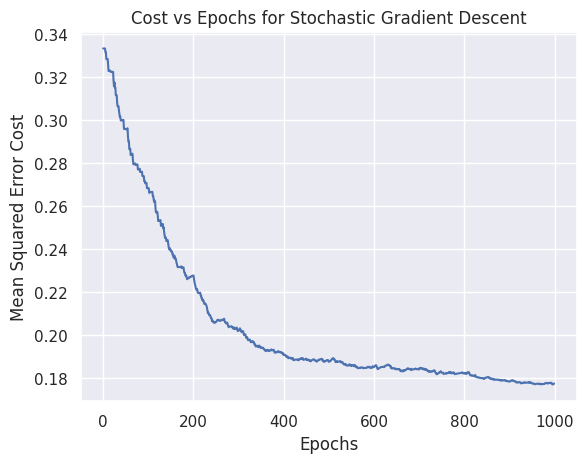

In [526]:
#Plotting "Cost vs Epochs" for Stochastic Gradient Descent
plt.plot(Scost)
plt.ylabel("Mean Squared Error Cost")
plt.xlabel("Epochs")
plt.title("Cost vs Epochs for Stochastic Gradient Descent")
plt.show()

BATCH GRADIENT DESCENT

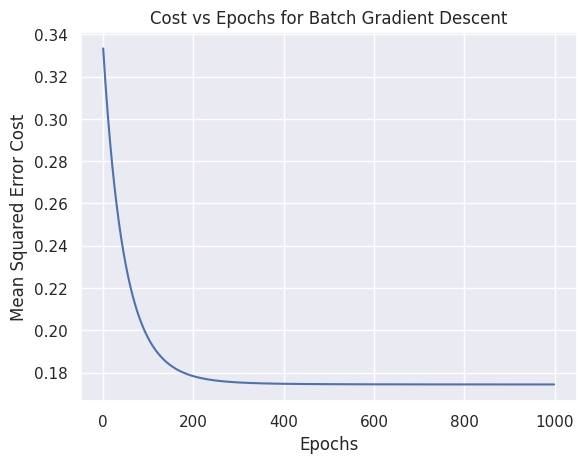

In [500]:
#Plotting "Cost vs Epochs" for Batch Gradient Descent
plt.plot(batch_cost)
plt.ylabel("Mean Squared Error Cost")
plt.xlabel("Epochs")
plt.title("Cost vs Epochs for Batch Gradient Descent")
plt.show()

# **_4. Comparison of Lasso and Ridge Regression using Polynomial Regression_**



### Lasso Regression vs Ridge Regression
Lasso Regression and Ridge Regression are both regularization techniques for linear regression, but they differ in how they apply regularization. Lasso adds a penalty term based on the absolute values of coefficients, encouraging sparsity and feature selection, making it suitable when you want to identify and emphasize important predictors. Ridge adds a penalty term based on the squared values of coefficients, preventing coefficients from becoming too large and reducing multicollinearity. It doesn't force coefficients to zero, making it appropriate when all features are potentially relevant. The choice between them depends on whether you prioritize feature selection (Lasso) or multicollinearity reduction (Ridge).

## **_Lasso Regression_**

In [529]:
degree = 3
features = len(X_train[0])
rows = len(X_train)
Lrate = 0.01
Llamda = 0.01
epochs = 500


In [530]:
from itertools import combinations

def poly(X_train, degree):
    k = len(X_train)  # Number of samples in the input matrix
    matrix = X_train  # Input matrix
    max_power = degree  # Degree of polynomial expansion
    expanded_matrix = []  # List to store the expanded feature vectors

    for row_matrix in matrix:
        expanded_terms = []  # List to store the expanded terms for each sample
        expanded_terms.extend(row_matrix)  # Adding original features to the expanded terms

        if max_power > 1:
            for power in range(2, max_power + 1):
                for xi in row_matrix:
                    expanded_terms.append(xi ** power)  # Adding higher-order polynomial terms

            for i, j in combinations(range(len(row_matrix)), 2):
                expanded_terms.append(row_matrix[i] * row_matrix[j])  # Cross-product terms

        expanded_matrix.append(expanded_terms)  # Adding the expanded terms for each sample

    expanded_matrix = np.array(expanded_matrix)  # Convert the list to a NumPy array
    return expanded_matrix

# Call the function to perform polynomial feature expansion
X_poly = poly(X_train, degree)


In [531]:
# Initializing the weight vector, bias, and setting initial cost to 0
wL = np.zeros(len(X_poly[0]), dtype=float)
bL = 0
cost = 0
poly1_cost=[]
# Training loop
for i in range(epochs):
    # Initializing the weight and bias differences
    wLdiff = np.zeros(len(X_poly[0]), dtype=float)
    bLdiff = 0

    # Initializing the cost for this epoch
    epoch_cost = 0

    # Iterating over the training samples
    for j in range(rows):
        # Calculating the cost for this sample
        sample_cost = (np.dot(X_poly[j], wL) + bL - y_train[j]) ** 2
        epoch_cost += sample_cost

        # Calculating the bias difference
        bLdiff = bLdiff + (np.dot(X_poly[j], wL) + bL - y_train[j])

        # Calculating the weight differences for each feature
        for k in range(len(X_poly[0])):
            wLdiff[k] = wLdiff[k] + (np.dot(X_poly[j], wL) + bL - y_train[j]) * X_poly[j][k]

    # Updating the bias
    bL = bL - Lrate * bLdiff / rows

    # Updating the weights with L2 regularization term (Llamda)
    for k in range(len(X_poly[0])):
        wL[k] = wL[k] - Lrate * (1 / rows * wLdiff[k] + Llamda * wL[k])

    # Adding the L2 regularization term to the cost
    cost = epoch_cost + (Llamda / rows) * np.dot(wL, np.ones(len(X_poly[0]), dtype=float))
    poly1_cost.append(cost)

    # Printing the epoch and cost every 25 epochs
    if i % 25 == 0:
        print(f"Epoch {i}: Cost = {cost}")


Epoch 0: Cost = 125.00000197460068
Epoch 25: Cost = 72.48336156945255
Epoch 50: Cost = 68.85919237070684
Epoch 75: Cost = 66.68600796107027
Epoch 100: Cost = 65.11489020400725
Epoch 125: Cost = 63.91689214619815
Epoch 150: Cost = 62.97699660235963
Epoch 175: Cost = 62.225416518733226
Epoch 200: Cost = 61.61564552420178
Epoch 225: Cost = 61.11501242161162
Epoch 250: Cost = 60.69977316110743
Epoch 275: Cost = 60.35224609914651
Epoch 300: Cost = 60.059015729903585
Epoch 325: Cost = 59.809750303222344
Epoch 350: Cost = 59.59639465669783
Epoch 375: Cost = 59.41260301511956
Epoch 400: Cost = 59.253330932395244
Epoch 425: Cost = 59.11453602513448
Epoch 450: Cost = 58.992955008024765
Epoch 475: Cost = 58.88593540977261


In [532]:
# Printing the bias term
print(f"Bias: {bL}")

# Printing the weight vector
print(f"Weight vector: {wL}")


Bias: 0.11993458538663879
Weight vector: [ 0.07  0.13 -0.05  0.04 -0.02  0.13  0.01  0.02  0.08  0.    0.02  0.01
  0.07  0.03  0.01  0.03 -0.01  0.01  0.   -0.02 -0.02 -0.01 -0.   -0.02
  0.02 -0.02  0.04  0.01  0.01  0.02 -0.03 -0.01  0.02 -0.01  0.03 -0.02
 -0.    0.02 -0.01 -0.03 -0.01  0.03  0.04  0.01 -0.01  0.01 -0.03 -0.03
 -0.02  0.03 -0.01  0.  ]


In [533]:
# Initializing a counter for correct predictions
correct = 0

# Iterating through the test data
for i in range(len(X_test)):
    # Performing polynomial feature expansion on the test data
    Xtest = poly(X_test, degree)

    # Calculating the predicted value using the trained weights and bias
    y_hat = np.dot(wL, Xtest[i]) + bL

    # Assigning a binary class label based on the predicted value
    if y_hat >= 0.5:
        y = 1
    else:
        y = 0

    # Checking if the predicted class matches the actual class (y_test)
    if y == y_test[i]:
        correct = correct + 1

# Calculating the accuracy by taking ratio of correct predictions to total predictions
accuracy = correct / len(X_test)

# Printing the accuracy as a percentage
print(f"Accuracy: {accuracy*100}%")



Accuracy: 74.4%


## **_Ridge Regression_**

In [534]:
degree = 3
features = len(X_train[0])
rows = len(X_train)
Rlrate = 0.01
Rlamda = 0.01
epochs = 500

In [535]:
from itertools import combinations

def poly(X, degree):
    k = len(X)  # Number of samples in the input matrix
    matrix = X  # Input matrix
    max_power = degree  # Degree of polynomial expansion
    expanded_matrix = []  # List to store the expanded feature vectors

    for row_matrix in matrix:
        expanded_terms = []  # List to store the expanded terms for each sample
        expanded_terms.extend(row_matrix)  # Adding original features to the expanded terms

        if max_power > 1:
            for power in range(2, max_power + 1):
                for xi in row_matrix:
                    expanded_terms.append(xi ** power)  # Adding higher-order polynomial terms

            for i, j in combinations(range(len(row_matrix)), 2):
                expanded_terms.append(row_matrix[i] * row_matrix[j])  # Cross-product terms

        expanded_matrix.append(expanded_terms)  # Adding the expanded terms for each sample

    expanded_matrix = np.array(expanded_matrix)  # Converting the list to a NumPy array
    return expanded_matrix


In [536]:
# Initializing the weight vector, bias, and setting initial cost to 0
wR = np.zeros(len(X_poly[0]), dtype=float)
bR = 0
cost = 0
poly2_cost=[]
# Training loop
for i in range(epochs):
    # Initializing the weight and bias differences
    wRdiff = np.zeros(len(X_poly[0]), dtype=float)
    bRdiff = 0

    # Initializing the cost for this epoch
    epoch_cost = 0

    # Iterating over the training samples
    for j in range(rows):
        # Calculating the cost for this sample
        sample_cost = (np.dot(X_poly[j], wR) + bR - y_train[j]) ** 2
        epoch_cost += sample_cost

        # Calculating the bias difference
        bRdiff = bRdiff + (np.dot(X_poly[j], wR) + bR - y_train[j])

        # Calculating the weight differences for each feature
        for k in range(len(X_poly[0])):
            wRdiff[k] = wRdiff[k] + (np.dot(X_poly[j], wR) + bR - y_train[j]) * X_poly[j][k]

    # Updating the bias
    bR = bR - Rlrate * bRdiff / rows

    # Updating the weights with L2 regularization term (Rlamda)
    for k in range(len(X_poly[0])):
        wR[k] = wR[k] - Rlrate * (1 / rows * wRdiff[k] + Rlamda * wR[k])

    # Adding the L2 regularization term to the cost
    cost = epoch_cost + (Rlamda / rows) * np.dot(wR, wR)
    poly2_cost.append(cost)
    # Printing the epoch and cost every 50 epochs
    if i % 50 == 0:
        print(f"Epoch {i}: Cost = {cost}")




Epoch 0: Cost = 125.00000000552097
Epoch 50: Cost = 68.85918191863931
Epoch 100: Cost = 65.11487903164402
Epoch 150: Cost = 62.97698490050478
Epoch 200: Cost = 61.61563346169003
Epoch 250: Cost = 60.6997608716205
Epoch 300: Cost = 60.05900331166903
Epoch 350: Cost = 59.596382180073356
Epoch 400: Cost = 59.253318447132614
Epoch 450: Cost = 58.99294254888807


In [443]:
# Printing the bias term
print(f"Bias: {bR}")

# Printing the weight vector
print(f"Weight vector: {wR}")


Bias: 0.1556511908777257
Weight vector: [ 0.06  0.16 -0.06  0.01 -0.05  0.1   0.   -0.02  0.08  0.    0.02  0.
  0.04  0.03  0.01 -0.01  0.03 -0.01  0.02  0.01 -0.    0.01 -0.05 -0.02
  0.02 -0.02  0.03 -0.    0.01  0.02 -0.02 -0.03 -0.    0.04  0.03  0.
 -0.01  0.01 -0.02 -0.03 -0.01  0.02 -0.02 -0.01]


In [537]:
# Initializing a counter for the correct predictions
correct = 0

# Iterating through the test data
for i in range(len(X_test)):
    # Performing the polynomial feature expansion on the test data
    Xtest = poly(X_test, degree)

    # Calculating the predicted value using the trained weights and bias
    y_hat = np.dot(wR, Xtest[i]) + bR

    # Assigning a binary class label based on the predicted value
    if y_hat >= 0.5:
        y = 1
    else:
        y = 0

    # Checking if the predicted class matches the actual class (y_test)
    if y == y_test[i]:
        correct = correct + 1

# Calculating the accuracy by taking the ratio of correct predictions to total predictions
accuracy = correct / len(X_test)

# Printing the accuracy as a percentage
print(f"Accuracy: {accuracy*100}%")


Accuracy: 74.4%


## **_Insights drawn (plots, markdown explanations)_**


Stochastic Gradient Descent is often preferred when you have a larger number of epochs available because it can converge faster in terms of training time per epoch compared to Batch Gradient Descent (BGD).
By updating the model's parameters more frequently with smaller mini-batches in each epoch, SGD can make quicker progress in terms of training time.
Batch Gradient Descent (BGD) Provides Better Accuracy:

Batch Gradient Descent typically provides more accurate updates because it computes gradients using the entire training dataset in each epoch.
Since BGD uses the complete dataset for gradient calculations, it often converges to a more precise solution in terms of model accuracy.

**LASSO REGRESSION**

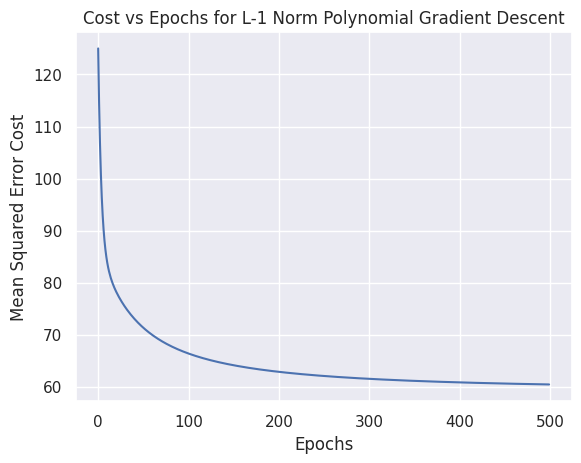

In [505]:
#Plotting "Cost vs Epochs" for L-1 Norm Polynomial Gradient Descent
plt.plot(poly1_cost)
plt.ylabel("Mean Squared Error Cost")
plt.xlabel("Epochs")
plt.title("Cost vs Epochs for L-1 Norm Polynomial Gradient Descent")
plt.show()

**RIDGE REGRESSION**

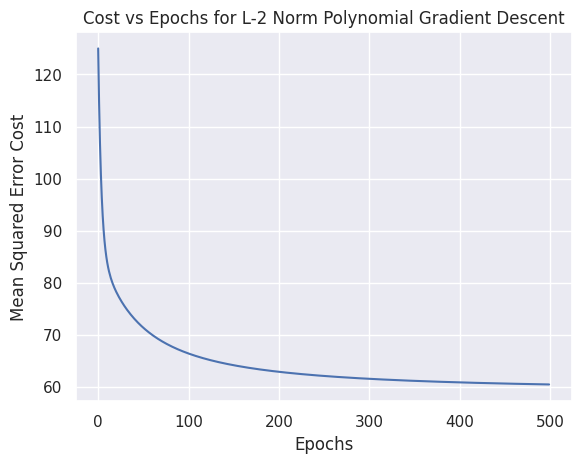

In [506]:
plt.plot(poly2_cost)
plt.ylabel("Mean Squared Error Cost")
plt.xlabel("Epochs")
plt.title("Cost vs Epochs for L-2 Norm Polynomial Gradient Descent")
plt.show()

# **_5. Comparison of Logistic Regression and Least Squares Classification_**

## **_Logistic Regression_**

Logistic Regression is a popular classification algorithm that models the probability of a binary outcome. It uses the sigmoid function to transform a linear combination of predictor variables into a value between 0 and 1, which represents the probability of belonging to the positive class. By training the model on labeled data, it learns the optimal coefficients for the linear equation. These coefficients define a decision boundary in the feature space, enabling the algorithm to classify new data points.

In [445]:
def sigmoid(theta, X, bias):
    # Computing the dot product of the feature matrix X and the parameter vector theta,
    # and adding the bias term.
    z = np.dot(X, theta) + bias

    # Computing the denominator of the sigmoid function.
    denom = 1 + np.exp(-z)

    # Calculating the sigmoid value.
    val = 1 / denom

    return val


In [446]:
# Initializing the weights, learning rate, number of epochs, and bias
sig_weight = np.ones(len(X_train[0]), dtype=float)
lrate = 0.1
epoch = 400
sig_bias = 0

# Training loop
for i in range(epoch):
    # Initializing the weight and bias differences, and cost
    weight_diff = np.zeros(len(X_train[0]), dtype=float)
    bias_diff = 0
    cost = 0

    # Iterating over the training samples
    for j in range(len(X_train)):
        # Calculating the bias difference
        bias_diff = bias_diff + (sigmoid(sig_weight, X_train[j], sig_bias) - y_train[j])

        # Calculating the weight differences for each feature
        for k in range(len(X_train[j])):
            weight_diff[k] = weight_diff[k] + ((sigmoid(sig_weight, X_train[j], sig_bias) - y_train[j]) * X_train[j][k])

        # Calculating the cost using the logistic loss function
        cost = cost + (y_train[j] * np.log(sigmoid(sig_weight, X_train[j], sig_bias)) + (1 - y_train[j]) * np.log(1 - sigmoid(sig_weight, X_train[j], sig_bias)))

    # Updating the weights and bias
    for l in range(len(X_train[0])):
        sig_weight[l] = sig_weight[l] - (lrate / len(X_train)) * weight_diff[l]

    sig_bias = sig_bias - (lrate / len(X_train)) * bias_diff
    cost = -1 / len(X_train) * cost

    # Printing the epoch and cost every 50 epochs
    if i % 50 == 0:
        print(f"Epoch {i}: Cost = {cost}")




Epoch 0: Cost = 1.2006794259761
Epoch 50: Cost = 0.6635172194545774
Epoch 100: Cost = 0.5300969686788048
Epoch 150: Cost = 0.5181544897296483
Epoch 200: Cost = 0.5161335601822089
Epoch 250: Cost = 0.5153960647585962
Epoch 300: Cost = 0.5150472121692706
Epoch 350: Cost = 0.51486454661112


In [447]:
# Printing the bias term
print(f"Bias: {sig_bias}")

# Printing the weight vector
print(f"Weight vector: {sig_weight}")


Bias: -0.9025749866178695
Weight vector: [ 0.46  0.98 -0.32  0.06 -0.17  0.55  0.11 -0.17]


In [448]:
# Initializing a counter for the correct predictions
correct = 0

# Iterating through the test data
for i in range(len(X_test)):
    # Calculating the predicted probability using the sigmoid function
    y_hat = sigmoid(sig_weight, X_test[i], sig_bias)

    # Assigning a binary class label based on the predicted probability
    if y_hat > 0.5:
        y = 1
    else:
        y = 0

    # Checking if the predicted class matches the actual class (y_test)
    if y == y_test[i]:
        correct = correct + 1

# Calculating the accuracy by taking the ratio of correct predictions to total predictions
accuracy = correct / len(X_test)

# Printing the accuracy as a percentage
print(f"Accuracy: {accuracy*100}%")



Accuracy: 76.8%


## **_Least Squares Classification_**

Least Squares Classification is a linear classification technique that minimizes the sum of squared errors between predicted and actual class labels. It seeks to find a linear decision boundary in the feature space that separates two classes. Data points are assigned to the class that minimizes the squared distance from the decision boundary. While it's a simple and interpretable method, it's particularly suited for scenarios where minimizing squared errors is a primary concern, such as in certain regression problems, rather than classification tasks with complex or overlapping class boundaries.

In [449]:
# Function to augment a matrix by prepending a 1 to each row to account for bias
def augMatrix(X):
    n = len(X)
    ones = np.ones((n, 1), dtype=float)
    X_aug = np.concatenate((ones, X), axis=1, dtype=float)
    return X_aug

# Function to assign an input vector to a class based on the highest y value
def predictClass(W, X):
    y_pred = []
    X_aug = augMatrix(X)
    for x in X_aug:
        y = W.T @ x.T
        predClass = np.argmax(y)
        y_pred.append(predClass)
    return y_pred

# Function to calculate the accuracy of our results
def accuracy(y_pred, y_test):
    correct = 0
    total = len(y_pred)
    for t in range(total):
        if y_pred[t] == y_test[t]:
            correct += 1
    return correct / total


In [450]:
# Generating the target vector using one hot encoding for the training data
T_train = pd.get_dummies(y_train).values

# Generating the target vector using one hot encoding for the test data
T_test = pd.get_dummies(y_test).values


In [451]:
# Augmenting the training feature matrix
X_train_aug = augMatrix(X_train)

# Calculating the weights using least squares method
W = (np.linalg.inv(X_train_aug.T @ X_train_aug)) @ (X_train_aug.T @ T_train)

# Predicting the classes for the test data
y = predictClass(W, X_test)

# Printing the predicted classes
print(y)

# Calculating and printing the accuracy of the predictions
acc = accuracy(y, y_test)
print(f"Accuracy: {acc*100}%")


[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]
Accuracy: 76.0%


## **_Insights drawn (plots, markdown explanations)_**

For our dataset, we get similar accuracy for logistic regression and least squares classification; this could be due to the linear relationship in the data. If the relationship between the predictors (independent variables) and the target variable (dependent variable) is approximately linear, both logistic regression and least squares classification might perform similarly. Least squares classification assumes a linear relationship between variables and tries to find the best-fitting linear regression line. If the data is approximately linear, both methods might provide similar results. The similarity in accuracy can also be due to the fact that we have a binary classification problem

# **_5. References_**

1.   https://eli.thegreenplace.net/2016/linear-regression/
2.   https://www.geeksforgeeks.org/difference-between-batch-gradient-descent-and-stochastic-gradient-descent/
3. https://www.ibm.com/topics/logistic-regression#:~:text=Resources-,What%20is%20logistic%20regression%3F,given%20dataset%20of%20independent%20variables.
4. https://towardsdatascience.com/derivation-of-least-squares-regressor-and-classifier-708be1358fe9

